<a href="https://colab.research.google.com/github/Aaryant31/Credit-Card-Default-Prediction/blob/main/Rahul_kumar_soni_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
#Importing lbrary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data='https://github.com/Aaryant31/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true'


In [3]:
pd.read_excel(data)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
#reading data
df=pd.read_excel(data,header=1)

# Data inspection

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
#checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No null value found**

In [8]:
#describing data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [9]:
#checking 1st Row
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [10]:
#droping Id Column since its is unique for every row
df=df.drop('ID',axis=1)

In [11]:
#viewing Data

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data cleaning

In [12]:
df['LIMIT_BAL'].max()

1000000

In [13]:
df['LIMIT_BAL'].min()

10000

In [14]:
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'Defaulters'}, inplace=True)

In [15]:
# renaming some feature name for better understanding of feature
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [16]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploratory Data Analysis and feature Engineering

In [17]:
#checking dependent valriable
df['Defaulters'].value_counts()

0    23364
1     6636
Name: Defaulters, dtype: int64

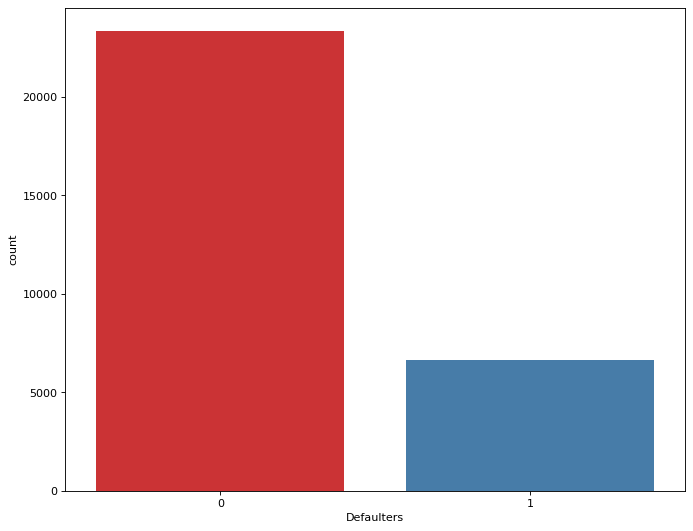

In [18]:
#visualizing dependent variable
plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x='Defaulters',data=df,palette='Set1')

**We can see that we have quite imbalance dataset**

## Bivariate Analysis

In [19]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [20]:
df_cat = df[categorical_features]


In [21]:
df_cat.shape

(30000, 3)

In [22]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1


In [23]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

2    18112
1    11888
Name: SEX, dtype: int64

count of EDUCATION features

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

count of MARRIAGE features

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64



In [24]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [25]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,Female,university,married
1,Female,university,single
2,Female,university,single
3,Female,university,married
4,Male,university,married


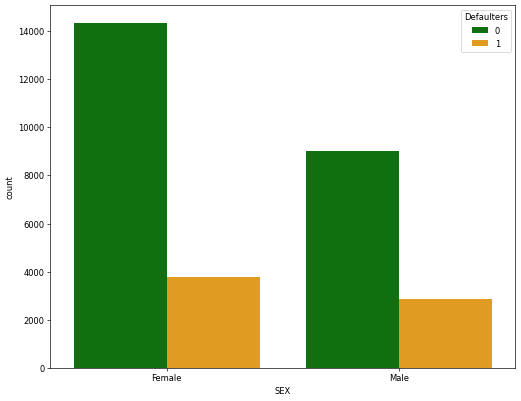

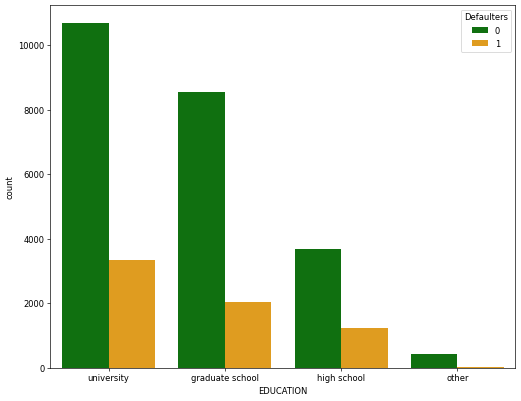

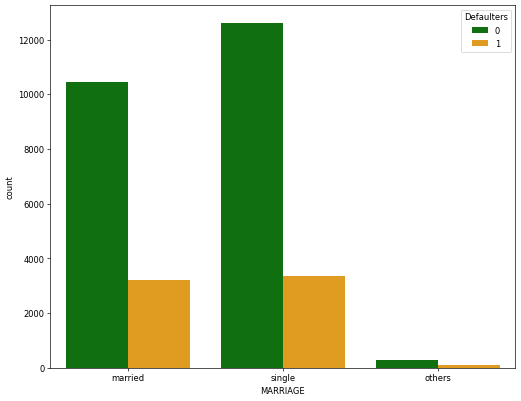

In [26]:
for column_name in df_cat.columns:
  plt.figure(figsize=(10,8),dpi=60)
  sns.countplot(x=column_name,data=df_cat,hue=df['Defaulters'],palette=["green",'orange'])
  plt.show()

In [27]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

Female    18112
Male      11888
Name: SEX, dtype: int64

count of EDUCATION features

university         14030
graduate school    10585
high school         4917
other                468
Name: EDUCATION, dtype: int64

count of MARRIAGE features

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64



In [28]:
df_cat['Defaulter'] = df['Defaulters']

In [29]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
0,Female,university,married,1
1,Female,university,single,1
2,Female,university,single,0
3,Female,university,married,0
4,Male,university,married,0


In [30]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['Defaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  Defaulter
0  Female   0.207763
1    Male   0.241672
         EDUCATION  Defaulter
0  graduate school   0.192348
1      high school   0.251576
2            other   0.070513
3       university   0.237349
  MARRIAGE  Defaulter
0  married   0.234717
1   others   0.236074
2   single   0.209283


### observation
for Sex feature:
  - we can see that  number of females are more than the males
  - but the default ratio of male is quite higher than female

for Education feature:
  - university and High School pesons are more likely to be defaulter in comparison with  the graduate school persons.

for Marriage feature:
  - people who are not married nor single are more likely to make default of bills in comparison with single and married person

In [31]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

### observation
- we can see here min age is 21 and maximum age is 79 in our dataset

In [32]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

In [33]:
#creating age_group column in our data set
df['age_group']=df['AGE'].apply(lambda x: age_cohort(x))

In [34]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,age_group
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-30
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,21-30
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,51-60


In [35]:
df['age_group'].value_counts().sort_values(ascending=False)

21-30         11013
31-40         10713
41-50          6005
51-60          1997
60 & above      272
Name: age_group, dtype: int64

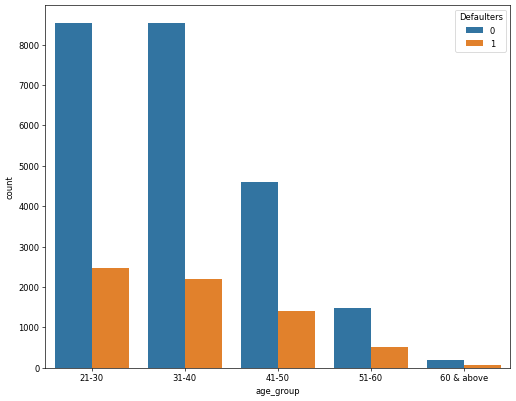

In [36]:
#visualizing age group
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df['age_group'].sort_values(),data=df,hue='Defaulters')

### obsevation:
- In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.


In [37]:
#checking the dedfault ratio of age_group
df[['Defaulters','age_group']].groupby('age_group').mean().reset_index()

,age_group,Defaulters
0,21-30,0.224371
1,31-40,0.204331
2,41-50,0.232973
3,51-60,0.252379
4,60 & above,0.268382


### observation
- we can clearly see that as the age incearse , chances of the default increase as higher age persons has more default ratio.

In [38]:
# drop age column because now we have age_group in our dataset
df=df.drop('AGE',axis=1)

In [39]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-30
1,120000,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,21-30
2,90000,2,2,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
3,50000,2,2,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,51-60


In [40]:
# Payment delay description
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [41]:
#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [42]:
# Bill Statement description
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


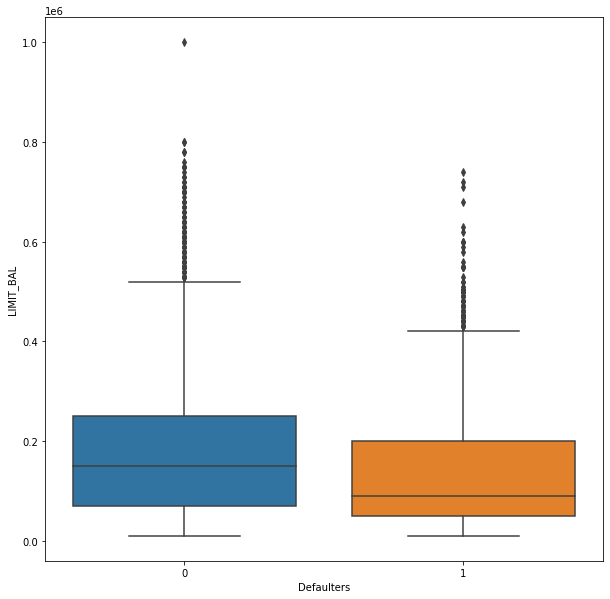

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Defaulters", y="LIMIT_BAL", data=df)

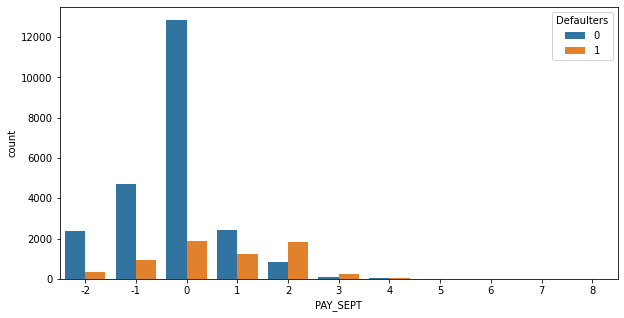

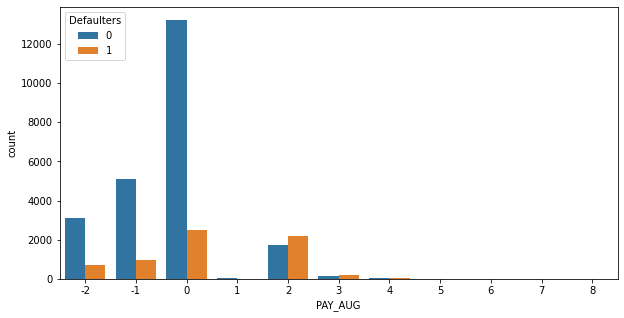

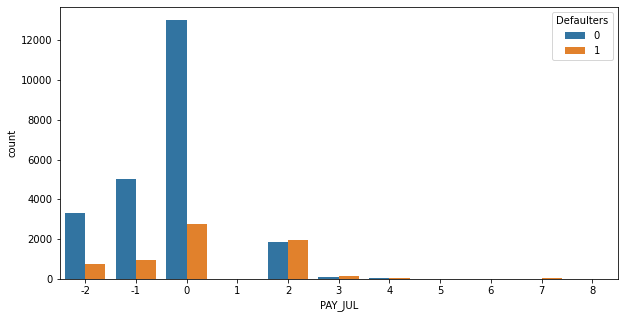

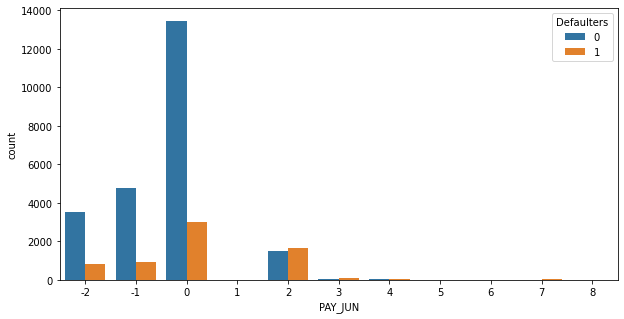

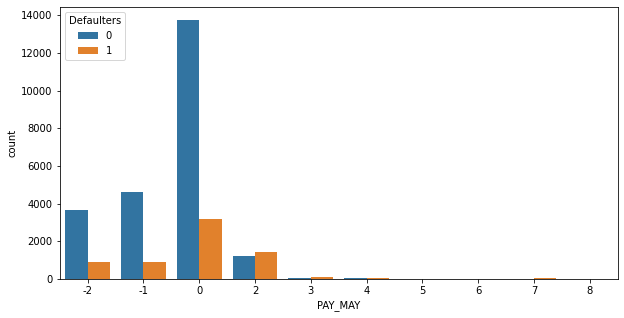

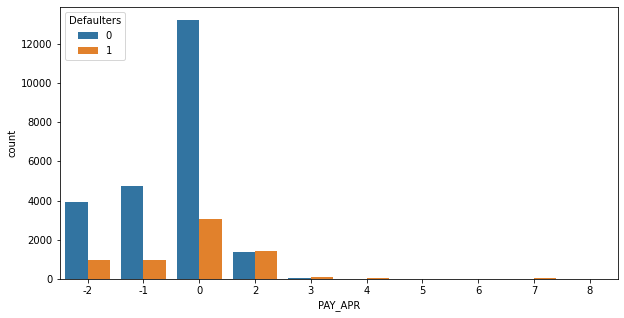

In [44]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df)

# 

In [45]:
# checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LIMIT_BAL      30000 non-null  int64 
 1   SEX            30000 non-null  int64 
 2   EDUCATION      30000 non-null  int64 
 3   MARRIAGE       30000 non-null  int64 
 4   PAY_SEPT       30000 non-null  int64 
 5   PAY_AUG        30000 non-null  int64 
 6   PAY_JUL        30000 non-null  int64 
 7   PAY_JUN        30000 non-null  int64 
 8   PAY_MAY        30000 non-null  int64 
 9   PAY_APR        30000 non-null  int64 
 10  BILL_AMT_SEPT  30000 non-null  int64 
 11  BILL_AMT_AUG   30000 non-null  int64 
 12  BILL_AMT_JUL   30000 non-null  int64 
 13  BILL_AMT_JUN   30000 non-null  int64 
 14  BILL_AMT_MAY   30000 non-null  int64 
 15  BILL_AMT_APR   30000 non-null  int64 
 16  PAY_AMT_SEPT   30000 non-null  int64 
 17  PAY_AMT_AUG    30000 non-null  int64 
 18  PAY_AMT_JUL    30000 non-n

## Using SMOTE(Synthetic Minority Oversampling Technique) to remediate Imbalance in dependent column

In [46]:
X=df.drop('Defaulters',axis=1)

In [47]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,21-30
1,120000,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,2,2,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,2,2,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [48]:
#maping numerical value to categorical for easy understanding
X['SEX']=X['SEX'].map({1:'Male',2:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [49]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,Female,university,married,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,21-30
1,120000,Female,university,single,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,Female,university,single,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,Female,university,married,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,Male,university,married,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [50]:
# one hot encoding for age group
X=pd.get_dummies(X)

In [51]:
X.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,SEX_Female,SEX_Male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,0,0,1,1,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,0,1,0,1,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,1,0,0,0,1,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,1,0,0,0,0,0,1,0


In [52]:
y=df['Defaulters']

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [54]:
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23364],
       [    1, 23364]])

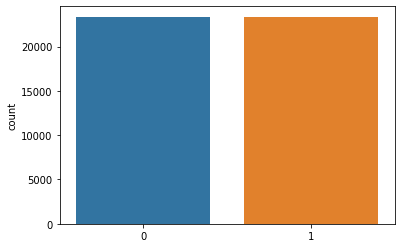

In [55]:
sns.countplot(y_smote)

## Train | Test Split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

In [57]:
X_train

array([[100000,      0,      0, ...,      0,      0,      0],
       [120000,      1,     -2, ...,      0,      0,      0],
       [320000,     -1,      0, ...,      0,      0,      0],
       ...,
       [340000,     -1,     -1, ...,      0,      1,      0],
       [230000,      2,      0, ...,      0,      0,      0],
       [360000,     -2,     -2, ...,      1,      0,      0]])

In [58]:
#Scaling Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Creating Function

In [59]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]


In [60]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))


# creating function to get feature importance 

In [61]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);
   

# Logistic Regression

In [62]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

In [63]:
#creating Instance of Logistic Regression

log_model= LogisticRegression()

In [64]:
run_and_evaluate_model(log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 0.0123min 

score matrix for train
********************************************************************************
The accuracy is  0.864549449295212
The precision is  0.9546847167794799
The recall is  0.76521987435751
The f1 is  0.8495165636392455
the auc  is  0.8644758130911638

confusion_matrix 
  [[16900   636]
 [ 4111 13399]]

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.96      0.88     17536
           1       0.95      0.77      0.85     17510

    accuracy                           0.86     35046
   macro avg       0.88      0.86      0.86     35046
weighted avg       0.88      0.86      0.86     35046



score matrix for test
********************************************************************************
The accuracy is  0.8655196028077384
The precision is  0.9622274983811785
The recall is  0.761530577382986
The f1 is  0.8501954801182416
the auc  is  0.8657515618555286

confusion_matrix 
  [[5653

### implementing GridSearch for Hyperparameter Tuning

In [65]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [66]:
#creating Grid model to perform grid search

grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='accuracy') 

In [67]:
#run_and_score(log_reg_grid, X_test_lr, X_train_lr, y_test, y_train)
run_and_evaluate_model(grid_log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  57 out of  60 | elapsed:    7.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.6s finished


Training time: 0.1494min 

score matrix for train
********************************************************************************
The accuracy is  0.8651771956856703
The precision is  0.951671023811206
The recall is  0.7692175899486008
The f1 is  0.8507721946751728
the auc  is  0.8651060577480231

confusion_matrix 
  [[16852   684]
 [ 4041 13469]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17536
           1       0.95      0.77      0.85     17510

    accuracy                           0.87     35046
   macro avg       0.88      0.87      0.86     35046
weighted avg       0.88      0.87      0.86     35046



score matrix for test
********************************************************************************
The accuracy is  0.8675740455401473
The precision is  0.9598547939355114
The recall is  0.7678510420225487
The f1 is  0.8531840182215051
the auc  is  0.8677964887532099

confusion_matrix 
  [[5

In [68]:
grid_log_model.best_estimator_.coef_

array([[-0.05204165,  0.58854924,  0.10639688,  0.0620927 ,  0.02295407,
         0.04813054, -0.00455358, -0.30434963,  0.05674646,  0.04501089,
         0.03650487,  0.04428225,  0.01259967, -0.15021838, -0.19028584,
        -0.06323914, -0.06491052, -0.06231639, -0.03145939, -1.24371979,
        -1.12796016, -1.13406588, -0.89868038, -0.3803148 , -1.28083543,
        -1.08050439, -0.21663993, -1.19548169, -1.28838707, -1.25245264,
        -0.99239605, -0.58832831, -0.22139808]])

In [69]:
optimal_log_model=grid_log_model.best_estimator_.coef_

In [70]:
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal_log_model).ravel() })

In [71]:
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [72]:
imp_feat

,Features,Importance
28,age_group_21-30,1.288387
24,EDUCATION_university,1.280835
29,age_group_31-40,1.252453
19,SEX_Female,1.243720
27,MARRIAGE_single,1.195482
21,EDUCATION_graduate school,1.134066
20,SEX_Male,1.127960
25,MARRIAGE_married,1.080504
30,age_group_41-50,0.992396
22,EDUCATION_high school,0.898680


==========================Features Importance============================

 [[-0.05204165  0.58854924  0.10639688  0.0620927   0.02295407  0.04813054
  -0.00455358 -0.30434963  0.05674646  0.04501089  0.03650487  0.04428225
   0.01259967 -0.15021838 -0.19028584 -0.06323914 -0.06491052 -0.06231639
  -0.03145939 -1.24371979 -1.12796016 -1.13406588 -0.89868038 -0.3803148
  -1.28083543 -1.08050439 -0.21663993 -1.19548169 -1.28838707 -1.25245264
  -0.99239605 -0.58832831 -0.22139808]]



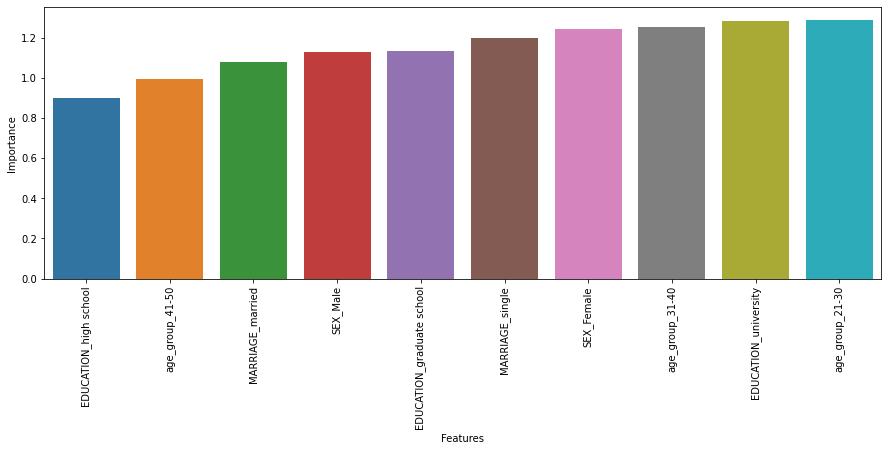

In [73]:
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(15,5))
print(f'==========================Features Importance============================\n\n {optimal_log_model}\
\n=========================================================================\n') 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance')
plt.xticks(rotation=90);

In [74]:
grid_log_model.best_params_

{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

# Decision Tree

In [75]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
run_and_evaluate_model(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.0093min 

score matrix for train
********************************************************************************
The accuracy is  0.8235461964275523
The precision is  0.8923919068736141
The recall is  0.7355225585379783
The f1 is  0.806399098365788
the auc  is  0.8234809416777482

confusion_matrix 
  [[15983  1553]
 [ 4631 12879]]

Classification Report

              precision    recall  f1-score   support

           0       0.78      0.91      0.84     17536
           1       0.89      0.74      0.81     17510

    accuracy                           0.82     35046
   macro avg       0.83      0.82      0.82     35046
weighted avg       0.83      0.82      0.82     35046



score matrix for test
********************************************************************************
The accuracy is  0.8272556069166239
The precision is  0.9026028547439127
The recall is  0.7345404851383669
The f1 is  0.8099453757769824
the auc  is  0.8274624182726837

confusion_matrix 
  [[5

In [76]:
DecisionTree.feature_importances_

array([0.        , 0.2283703 , 0.08607192, 0.01209117, 0.00255966,
       0.        , 0.01897224, 0.        , 0.0026445 , 0.        ,
       0.        , 0.00629388, 0.        , 0.01709882, 0.02302679,
       0.00261263, 0.        , 0.        , 0.        , 0.01751922,
       0.11618278, 0.00951223, 0.035098  , 0.02119563, 0.01502542,
       0.25228927, 0.05740778, 0.05831718, 0.00367662, 0.00213973,
       0.00758734, 0.00430689, 0.        ])

==========================Features Importance============================

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  



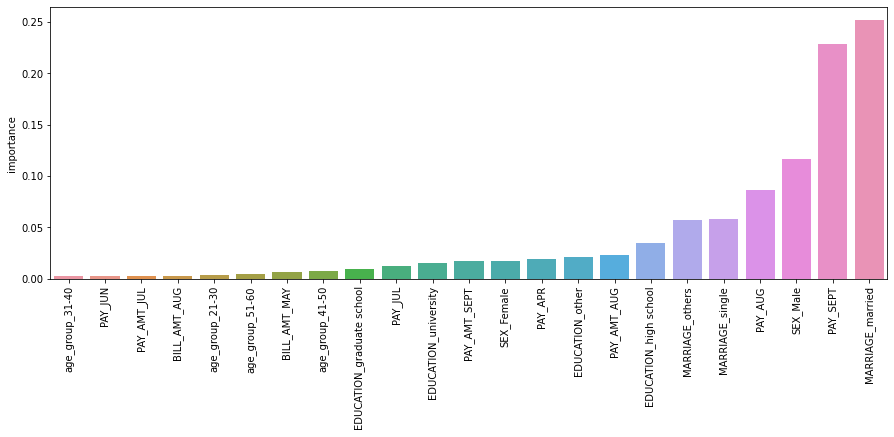

In [77]:
get_features_importance(DecisionTree,X_train)

# Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [79]:
run_and_evaluate_model(rfc_model,X_train, X_test, y_train, y_test)

Training time: 0.1401min 

score matrix for train
********************************************************************************
The accuracy is  0.9982308965359813
The precision is  0.9986282578875172
The recall is  0.997829811536265
The f1 is  0.9982288750499914
the auc  is  0.9982305991987896

confusion_matrix 
  [[17512    24]
 [   38 17472]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17536
           1       1.00      1.00      1.00     17510

    accuracy                           1.00     35046
   macro avg       1.00      1.00      1.00     35046
weighted avg       1.00      1.00      1.00     35046



score matrix for test
********************************************************************************
The accuracy is  0.8806711179592536
The precision is  0.9148065476190477
The recall is  0.8401093269559275
The f1 is  0.8758682101513804
the auc  is  0.8807615955301258

confusion_matrix 
  [[5

### implementing gridsearch for hyperparameter tuning in Random Forest

In [80]:
# finding the best parameters for knn_model by gridsearchcv
grid_values = {'n_estimators': [150,200,250],'max_depth': [3,5,9],'criterion': ['entropy']}
grid_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = grid_values, scoring='balanced_accuracy',cv=5,verbose=5,n_jobs=-1)

In [81]:
run_and_evaluate_model(grid_rfc_model,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.9min finished


Training time: 5.1463min 

score matrix for train
********************************************************************************
The accuracy is  0.8666609598812989
The precision is  0.9048249763481552
The recall is  0.8193032552826957
The f1 is  0.8599430540986064
the auc  is  0.8666258520939026

confusion_matrix 
  [[16027  1509]
 [ 3164 14346]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     17536
           1       0.90      0.82      0.86     17510

    accuracy                           0.87     35046
   macro avg       0.87      0.87      0.87     35046
weighted avg       0.87      0.87      0.87     35046



score matrix for test
********************************************************************************
The accuracy is  0.8543913713405239
The precision is  0.8951474785918173
The recall is  0.8035531260676461
The f1 is  0.8468809073724006
the auc  is  0.8545047716817296

confusion_matrix 
  [[

In [82]:
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 150}

In [83]:
grid_rfc_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
optimal__rfc_model=grid_rfc_model.best_estimator_

==========================Features Importance============================

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)  



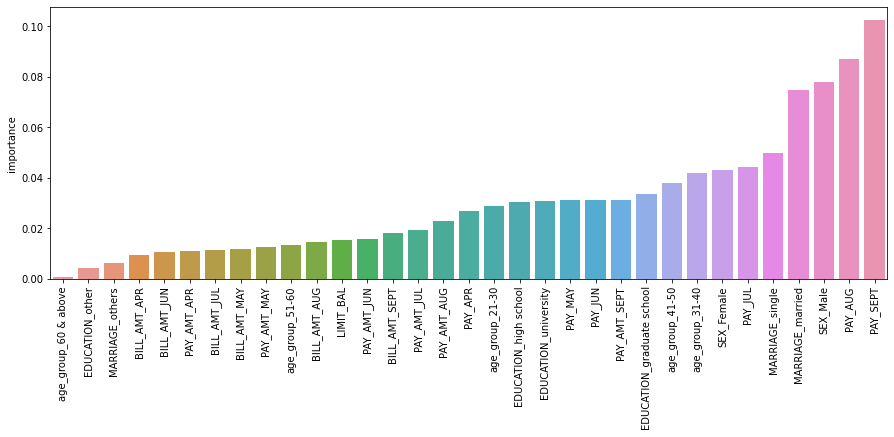

In [85]:
get_features_importance(optimal__rfc_model,X_train)

# Support Vector Machine

In [86]:
from sklearn.svm import SVC
svc_model=SVC()

In [87]:
run_and_evaluate_model(svc_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 1.2239min 

score matrix for train
********************************************************************************
The accuracy is  0.8748216629572562
The precision is  0.948956551488197
The recall is  0.7920616790405482
The f1 is  0.8634396887159532
the auc  is  0.8747603103231938

confusion_matrix 
  [[16790   746]
 [ 3641 13869]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     17536
           1       0.95      0.79      0.86     17510

    accuracy                           0.87     35046
   macro avg       0.89      0.87      0.87     35046
weighted avg       0.89      0.87      0.87     35046



score matrix for test
********************************************************************************
The accuracy is  0.871939736346516
The precision is  0.9502066115702479
The recall is  0.7856166723607789
The f1 is  0.8601084720403964
the auc  is  0.8721322895091471

confusion_matrix 
  [[55

### Hyperparameter tuning for SVM

In [88]:
params={'C':[0.01,0.1,1],'kernel':['rbf']}
svc_grid_model= GridSearchCV(svc_model,param_grid=params)

In [89]:
run_and_evaluate_model(svc_grid_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 12.988min 

score matrix for train
********************************************************************************
The accuracy is  0.8748216629572562
The precision is  0.948956551488197
The recall is  0.7920616790405482
The f1 is  0.8634396887159532
the auc  is  0.8747603103231938

confusion_matrix 
  [[16790   746]
 [ 3641 13869]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     17536
           1       0.95      0.79      0.86     17510

    accuracy                           0.87     35046
   macro avg       0.89      0.87      0.87     35046
weighted avg       0.89      0.87      0.87     35046



score matrix for test
********************************************************************************
The accuracy is  0.871939736346516
The precision is  0.9502066115702479
The recall is  0.7856166723607789
The f1 is  0.8601084720403964
the auc  is  0.8721322895091471

confusion_matrix 
  [[55

In [90]:
svc_grid_model.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [91]:
svc_grid_model.best_params_

{'C': 1, 'kernel': 'rbf'}

---
#XGboost
---

In [92]:
from xgboost import XGBClassifier

In [93]:
# creating XGBRegressor model
xgboost_model=XGBClassifier()

In [94]:
run_and_evaluate_model(xgboost_model,X_train,X_test,y_train,y_test)

Training time: 0.0754min 

score matrix for train
********************************************************************************
The accuracy is  0.872168007761228
The precision is  0.9299762407602957
The recall is  0.804740148486579
The f1 is  0.8628375482211744
the auc  is  0.8721180213235815

confusion_matrix 
  [[16475  1061]
 [ 3419 14091]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     17536
           1       0.93      0.80      0.86     17510

    accuracy                           0.87     35046
   macro avg       0.88      0.87      0.87     35046
weighted avg       0.88      0.87      0.87     35046



score matrix for test
********************************************************************************
The accuracy is  0.8726245505906522
The precision is  0.9341686555290374
The recall is  0.8023573624871883
The f1 is  0.8632604300680022
the auc  is  0.8727812893424273

confusion_matrix 
  [[54

### Hyperparameter tuning for Xgboost

In [95]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_xgboost_model=GridSearchCV(estimator=xgboost_model,param_grid=params,cv=5,scoring='balanced_accuracy',verbose=5,n_jobs=-1)

In [96]:
# training and evaluating the xgb_grid
run_and_evaluate_model(grid_xgboost_model,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.4min finished


Training time: 4.5301min 

score matrix for train
********************************************************************************
The accuracy is  0.9167665354106032
The precision is  0.9681144543529865
The recall is  0.8617932609937179
The f1 is  0.911865123727226
the auc  is  0.916725781956713

confusion_matrix 
  [[17039   497]
 [ 2420 15090]]

Classification Report

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     17536
           1       0.97      0.86      0.91     17510

    accuracy                           0.92     35046
   macro avg       0.92      0.92      0.92     35046
weighted avg       0.92      0.92      0.92     35046



score matrix for test
********************************************************************************
The accuracy is  0.8775038520801233
The precision is  0.9349065880039331
The recall is  0.8120942944994876
The f1 is  0.8691836548130542
the auc  is  0.877649755348577

confusion_matrix 
  [[549

In [97]:
grid_xgboost_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [98]:
optimal_xgboost_model=grid_xgboost_model.best_estimator_

==========================Features Importance============================

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)  



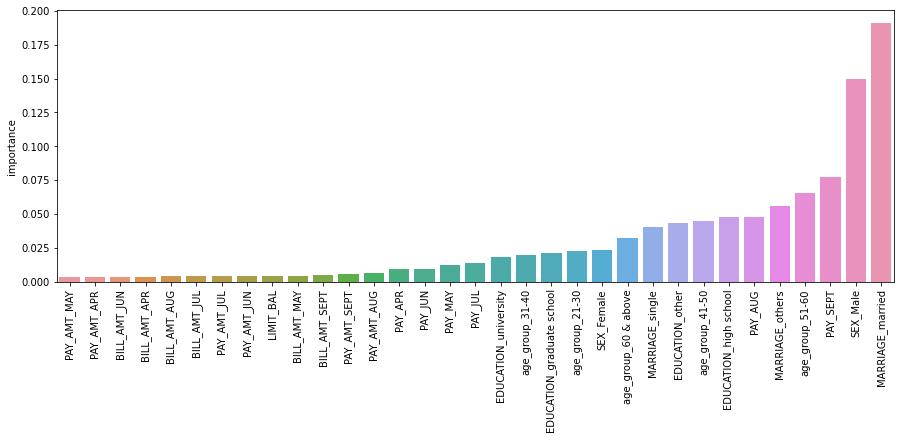

In [99]:
get_features_importance(optimal_xgboost_model,X_train)

---
# CatBoost
---

In [100]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 21 kB/s 


In [101]:
from catboost import CatBoostClassifier

In [102]:
cb_model=CatBoostClassifier(verbose=0)

In [103]:
cb_model=CatBoostClassifier()

In [104]:
run_and_evaluate_model(cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.047043
0:	learn: 0.6495094	total: 60.6ms	remaining: 1m
1:	learn: 0.6184742	total: 73.8ms	remaining: 36.8s
2:	learn: 0.5926794	total: 86.1ms	remaining: 28.6s
3:	learn: 0.5704517	total: 98.3ms	remaining: 24.5s
4:	learn: 0.5607042	total: 111ms	remaining: 22.1s
5:	learn: 0.5519722	total: 124ms	remaining: 20.5s
6:	learn: 0.5437744	total: 137ms	remaining: 19.4s
7:	learn: 0.5269031	total: 148ms	remaining: 18.4s
8:	learn: 0.5123807	total: 161ms	remaining: 17.7s
9:	learn: 0.4935529	total: 173ms	remaining: 17.1s
10:	learn: 0.4756403	total: 185ms	remaining: 16.7s
11:	learn: 0.4625358	total: 203ms	remaining: 16.7s
12:	learn: 0.4548277	total: 216ms	remaining: 16.4s
13:	learn: 0.4504283	total: 229ms	remaining: 16.1s
14:	learn: 0.4403968	total: 242ms	remaining: 15.9s
15:	learn: 0.4342552	total: 257ms	remaining: 15.8s
16:	learn: 0.4268764	total: 269ms	remaining: 15.6s
17:	learn: 0.4215740	total: 282ms	remaining: 15.4s
18:	learn: 0.4188026	total: 296ms	remaining: 15.3s
19:	learn:

### Hyperparameter tuning for Catboost

In [105]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_cb_model=GridSearchCV(estimator=cb_model,param_grid=params,cv=3,scoring='balanced_accuracy',verbose=0,n_jobs=-1)

In [106]:
# training and evaluating the catBoost
run_and_evaluate_model(grid_cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.267929
0:	learn: 0.5335957	total: 11.9ms	remaining: 1.78s
1:	learn: 0.4402157	total: 23.2ms	remaining: 1.72s
2:	learn: 0.4172747	total: 33.6ms	remaining: 1.65s
3:	learn: 0.3944999	total: 44.1ms	remaining: 1.61s
4:	learn: 0.3686419	total: 53.6ms	remaining: 1.55s
5:	learn: 0.3622576	total: 64.1ms	remaining: 1.54s
6:	learn: 0.3576092	total: 74.3ms	remaining: 1.52s
7:	learn: 0.3543984	total: 84.3ms	remaining: 1.5s
8:	learn: 0.3444043	total: 94.5ms	remaining: 1.48s
9:	learn: 0.3419161	total: 105ms	remaining: 1.46s
10:	learn: 0.3399746	total: 115ms	remaining: 1.45s
11:	learn: 0.3328589	total: 126ms	remaining: 1.44s
12:	learn: 0.3305667	total: 136ms	remaining: 1.43s
13:	learn: 0.3255805	total: 147ms	remaining: 1.43s
14:	learn: 0.3245888	total: 158ms	remaining: 1.42s
15:	learn: 0.3233839	total: 168ms	remaining: 1.41s
16:	learn: 0.3224011	total: 179ms	remaining: 1.4s
17:	learn: 0.3218517	total: 189ms	remaining: 1.39s
18:	learn: 0.3214231	total: 205ms	remaining: 1.41s
19:	

In [107]:
optimal_catboost_model=grid_cb_model.best_estimator_

In [108]:
grid_cb_model.best_estimator_.feature_importances_

array([ 0.7718343 ,  1.71213151,  0.91751054,  2.3317812 ,  0.36398352,
        0.38397428,  0.21217969,  0.69236019,  0.38937712,  0.33803549,
        0.4156476 ,  0.39667655,  0.33054485,  0.47660827,  0.44591573,
        0.49254335,  0.32373657,  0.29556823,  0.37658049, 13.10863759,
       11.32227477, 15.178242  , 10.29556915,  1.99295536, 16.46088709,
        2.78477951,  0.13865545,  2.91477341,  4.57193111,  4.59253266,
        3.22609193,  1.59289535,  0.15278513])

==========================Features Importance============================




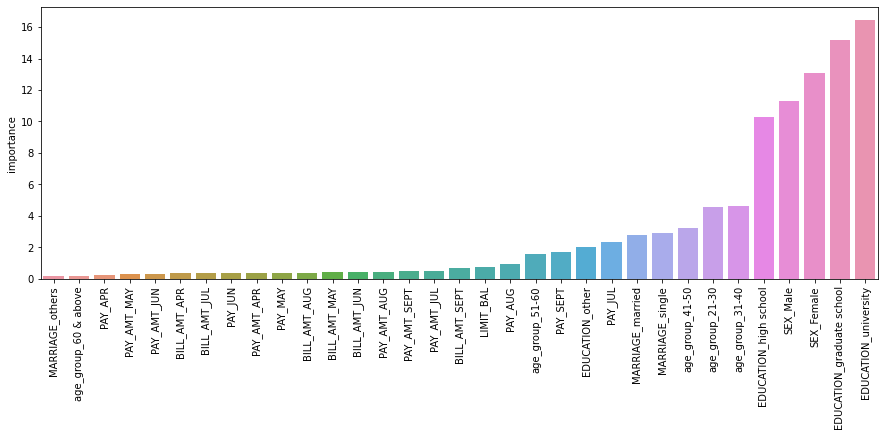

In [109]:
get_features_importance(optimal_catboost_model,X_train)

In [110]:
grid_cb_model.best_params_

{'max_depth': 5, 'n_estimators': 150}

# Model's Score matrix

In [111]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [112]:
# list of all models
model_name=['Logestic Regrestion','grid_log_regg','Desision Tree','Random forest','grid random forest','SVM','Grid SVM','XGboost','Grid Xgboost','CATBoost','Grid Catboost']

In [113]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [115]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [116]:
matrix_df

,Models,accuracy,precision,recall,f1,roc_auc
0,Logestic Regrestion,0.865520,0.962227,0.761531,0.850195,0.865752
1,grid_log_regg,0.867574,0.959855,0.767851,0.853184,0.867796
2,Desision Tree,0.827256,0.902603,0.734540,0.809945,0.827462
3,Random forest,0.880671,0.914807,0.840109,0.875868,0.880762
4,grid random forest,0.854391,0.895147,0.803553,0.846881,0.854505
5,SVM,0.871940,0.950207,0.785617,0.860108,0.872132
6,Grid SVM,0.871940,0.950207,0.785617,0.860108,0.872132
7,XGboost,0.872625,0.934169,0.802357,0.863260,0.872781
8,Grid Xgboost,0.877504,0.934907,0.812094,0.869184,0.877650
9,CATBoost,0.874422,0.933584,0.806799,0.865573,0.874573
